In [ ]:
# 1. Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
# 2. Load Titanic Dataset
titanic = sns.load_dataset('titanic')
print(f"Dataset shape: {titanic.shape}")

Dataset shape: (891, 15)


In [ ]:
# 3. Explore Dataset
print(titanic.head())
print("\nMissing values per column:")
print(titanic.isnull().sum())

print("\nSurvival counts:")
print(titanic['survived'].value_counts())

   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  

Missing values per column:
survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
a

In [ ]:
# 4. Data Cleaning & Preprocessing
# Drop columns with too many missing values or not useful for this simple model
titanic = titanic.drop(columns=['deck', 'embark_town', 'alive', 'class', 'who', 'adult_male', 'alone'])

# Fill missing age with median
titanic['age'].fillna(titanic['age'].median(), inplace=True)

# Drop rows with missing embarked (very few)
titanic = titanic.dropna(subset=['embarked'])

# Encode categorical variables
le_sex = LabelEncoder()
titanic['sex'] = le_sex.fit_transform(titanic['sex'])

le_embarked = LabelEncoder()
titanic['embarked'] = le_embarked.fit_transform(titanic['embarked'])

# Features and target
features = ['pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'embarked']
X = titanic[features]
y = titanic['survived']

print("\nFeature sample:")
print(X.head())


Feature sample:
   pclass  sex   age  sibsp  parch     fare  embarked
0       3    1  22.0      1      0   7.2500         2
1       1    0  38.0      1      0  71.2833         0
2       3    0  26.0      0      0   7.9250         2
3       1    0  35.0      1      0  53.1000         2
4       3    1  35.0      0      0   8.0500         2


/tmp/ipython-input-2822048888.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic['age'].fillna(titanic['age'].median(), inplace=True)


In [ ]:
# 5. Scale Features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
# 6. Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

In [ ]:
# 7. Train Logistic Regression Model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)


Accuracy: 0.8090

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.88      0.85       110
           1       0.78      0.69      0.73        68

    accuracy                           0.81       178
   macro avg       0.80      0.79      0.79       178
weighted avg       0.81      0.81      0.81       178

Confusion Matrix:


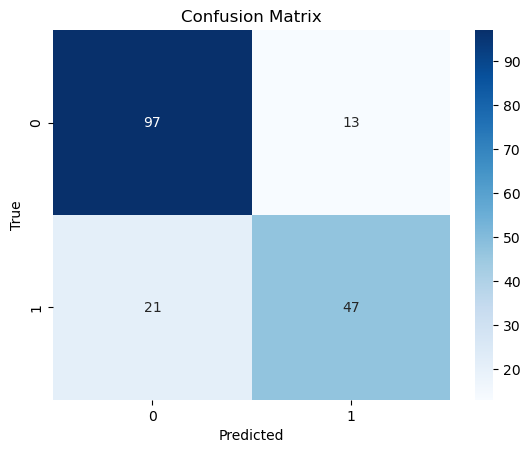

In [ ]:
# 8. Evaluate Model
y_pred = model.predict(X_test)

acc = accuracy_score(y_test, y_pred)
print(f"\nAccuracy: {acc:.4f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()